In [1]:
from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from Net import Net
from utils import train, test, plt_graph

In [2]:
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
model = Net().to(device)
summary(model, input_size=(1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 26, 26]             144
              ReLU-2           [-1, 16, 26, 26]               0
       BatchNorm2d-3           [-1, 16, 26, 26]              32
           Dropout-4           [-1, 16, 26, 26]               0
            Conv2d-5           [-1, 16, 24, 24]           2,304
              ReLU-6           [-1, 16, 24, 24]               0
       BatchNorm2d-7           [-1, 16, 24, 24]              32
           Dropout-8           [-1, 16, 24, 24]               0
            Conv2d-9            [-1, 8, 24, 24]             128
           Conv2d-10            [-1, 8, 24, 24]             576
             ReLU-11            [-1, 8, 24, 24]               0
      BatchNorm2d-12            [-1, 8, 24, 24]              16
          Dropout-13            [-1, 8, 24, 24]               0
        MaxPool2d-14            [-1, 8,

In [3]:
torch.manual_seed(1)
batch_size = 128

kwargs = {'num_workers': 1, 'pin_memory': True} if use_cuda else {}
train_loader = torch.utils.data.DataLoader(
    datasets.MNIST('../data', train=True, download=True,
                    transform=transforms.Compose([
                        transforms.RandomRotation((-7.0, 7.0), fill=(1,)),
                        transforms.ToTensor(),
                        transforms.Normalize((0.1307,), (0.3081,))
                    ])),
    batch_size=batch_size, shuffle=True, **kwargs)
test_loader = torch.utils.data.DataLoader(
    datasets.MNIST('../data', train=False, transform=transforms.Compose([
                        transforms.ToTensor(),
                        transforms.Normalize((0.1307,), (0.3081,))
                    ])),
    batch_size=batch_size, shuffle=True, **kwargs)


In [4]:
from torch.optim.lr_scheduler import StepLR
model = Net().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
criterion = F.nll_loss
#scheduler = StepLR(optimizer, step_size=6, gamma=0.25)

# Data to plot accuracy and loss graphs
train_losses = []
test_losses = []
train_acc = []
test_acc = []
for epoch in range(1, 20):
    train_acc,train_losses = train(model, device, train_loader, optimizer, criterion, train_acc, train_losses)
    test_acc, test_losses = test(model, device, test_loader, criterion, test_acc, test_losses)
    for param_group in optimizer.param_groups:
      print(param_group['lr'],epoch+1)
    #scheduler.step()

Train: Loss=0.1376 Batch_id=468 Accuracy=82.06: 100%|██████████| 469/469 [00:34<00:00, 13.77it/s]


Test set: Average loss: 0.0010, Accuracy: 9720/10000 (97.20%)

0.01 2


Train: Loss=0.1603 Batch_id=468 Accuracy=96.81: 100%|██████████| 469/469 [00:31<00:00, 14.99it/s]


Test set: Average loss: 0.0005, Accuracy: 9834/10000 (98.34%)

0.01 3


Train: Loss=0.0224 Batch_id=468 Accuracy=97.52: 100%|██████████| 469/469 [00:30<00:00, 15.28it/s]


Test set: Average loss: 0.0004, Accuracy: 9870/10000 (98.70%)

0.01 4


Train: Loss=0.0535 Batch_id=468 Accuracy=97.94: 100%|██████████| 469/469 [00:31<00:00, 14.89it/s]


Test set: Average loss: 0.0004, Accuracy: 9873/10000 (98.73%)

0.01 5


Train: Loss=0.0217 Batch_id=468 Accuracy=98.13: 100%|██████████| 469/469 [00:31<00:00, 15.10it/s]


Test set: Average loss: 0.0004, Accuracy: 9862/10000 (98.62%)

0.01 6


Train: Loss=0.1071 Batch_id=468 Accuracy=98.25: 100%|██████████| 469/469 [00:29<00:00, 15.95it/s]


Test set: Average loss: 0.0003, Accuracy: 9896/10000 (98.96%)

0.01 7


Train: Loss=0.0479 Batch_id=468 Accuracy=98.42: 100%|██████████| 469/469 [00:30<00:00, 15.52it/s]


Test set: Average loss: 0.0003, Accuracy: 9889/10000 (98.89%)

0.01 8


Train: Loss=0.0150 Batch_id=468 Accuracy=98.53: 100%|██████████| 469/469 [00:29<00:00, 15.84it/s]


Test set: Average loss: 0.0003, Accuracy: 9872/10000 (98.72%)

0.01 9


Train: Loss=0.0352 Batch_id=468 Accuracy=98.63: 100%|██████████| 469/469 [00:28<00:00, 16.20it/s]


Test set: Average loss: 0.0003, Accuracy: 9901/10000 (99.01%)

0.01 10


Train: Loss=0.0287 Batch_id=468 Accuracy=98.67: 100%|██████████| 469/469 [00:29<00:00, 15.88it/s]


Test set: Average loss: 0.0003, Accuracy: 9880/10000 (98.80%)

0.01 11


Train: Loss=0.0489 Batch_id=468 Accuracy=98.64: 100%|██████████| 469/469 [00:28<00:00, 16.20it/s]


Test set: Average loss: 0.0003, Accuracy: 9898/10000 (98.98%)

0.01 12


Train: Loss=0.0732 Batch_id=468 Accuracy=98.75: 100%|██████████| 469/469 [00:28<00:00, 16.18it/s]


Test set: Average loss: 0.0002, Accuracy: 9910/10000 (99.10%)

0.01 13


Train: Loss=0.0460 Batch_id=468 Accuracy=98.77: 100%|██████████| 469/469 [00:28<00:00, 16.19it/s]


Test set: Average loss: 0.0003, Accuracy: 9906/10000 (99.06%)

0.01 14


Train: Loss=0.0126 Batch_id=468 Accuracy=98.82: 100%|██████████| 469/469 [00:29<00:00, 16.16it/s]


Test set: Average loss: 0.0002, Accuracy: 9909/10000 (99.09%)

0.01 15


Train: Loss=0.0473 Batch_id=468 Accuracy=98.77: 100%|██████████| 469/469 [00:28<00:00, 16.46it/s]


Test set: Average loss: 0.0002, Accuracy: 9919/10000 (99.19%)

0.01 16


Train: Loss=0.0125 Batch_id=468 Accuracy=98.89: 100%|██████████| 469/469 [00:29<00:00, 15.97it/s]


Test set: Average loss: 0.0002, Accuracy: 9917/10000 (99.17%)

0.01 17


Train: Loss=0.0052 Batch_id=468 Accuracy=98.83: 100%|██████████| 469/469 [00:28<00:00, 16.24it/s]


Test set: Average loss: 0.0003, Accuracy: 9908/10000 (99.08%)

0.01 18


Train: Loss=0.0715 Batch_id=468 Accuracy=98.91: 100%|██████████| 469/469 [00:28<00:00, 16.50it/s]


Test set: Average loss: 0.0002, Accuracy: 9906/10000 (99.06%)

0.01 19


Train: Loss=0.0223 Batch_id=468 Accuracy=98.87: 100%|██████████| 469/469 [00:28<00:00, 16.50it/s]


Test set: Average loss: 0.0002, Accuracy: 9923/10000 (99.23%)

0.01 20


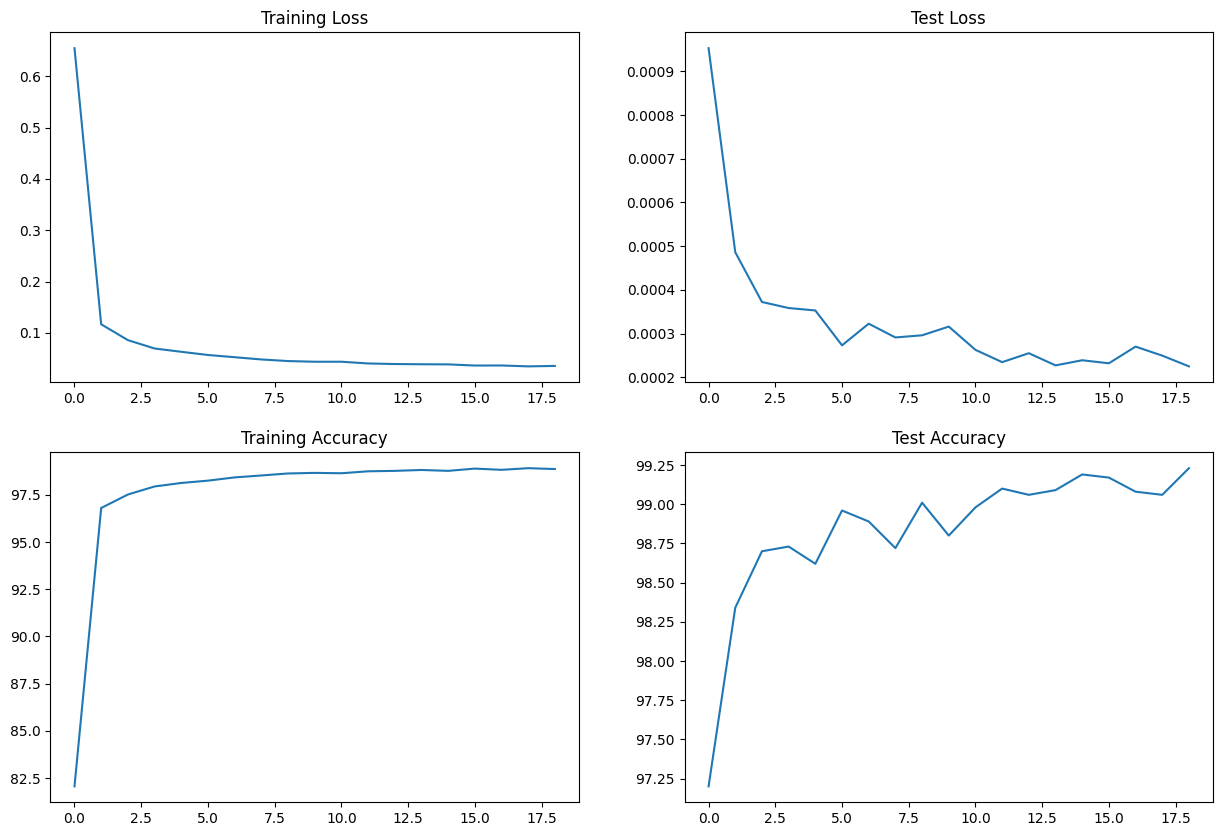

In [5]:
plt_graph(train_losses,test_losses,train_acc,test_acc)